In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

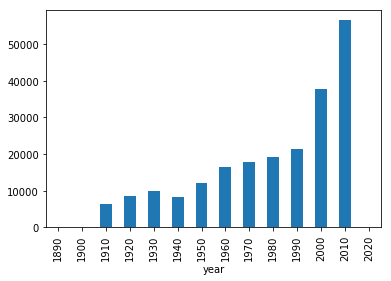

In [5]:
t = titles
t.groupby(t.year //10 *10). size().plot(kind ='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

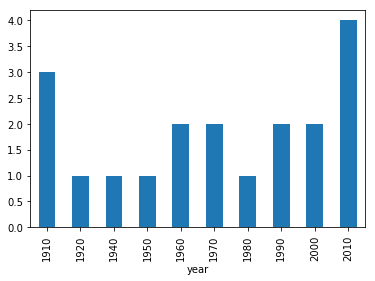

In [6]:
t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year //10 *10). size().plot(kind ='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [8]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    270
1951  actor      632
      actress    272
1952  actor      591
      actress    286
1953  actor      631
      actress    290
1954  actor      623
      actress    298
1955  actor      606
      actress    264
1956  actor      611
      actress    288
1957  actor      707
      actress    283
1958  actor      692
      actress    275
1959  actor      678
      actress    287
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [9]:
c = cast
c = c[c.year //10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6375
     actress    2813
2.0  actor      4377
     actress    4399
3.0  actor      5404
     actress    3015
4.0  actor      5400
     actress    2742
5.0  actor      5428
     actress    2443
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [11]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort_values(by=('n')).groupby(['year'])[['n']].max()
c

,n
year,
1963,15.0
2006,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [12]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [16]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64